# Lab | Random variable distributions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Get the numerical variables from our dataset.

In [3]:
numerical_dataset = dataset.select_dtypes(np.number)
numerical_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


## Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.


In [4]:
numerical_dataset.agg(['skew', 'kurtosis']).transpose()
# Skewness
# Fairly Symmetrical: -0.5 to 0.5
# Moderate Skewed: -0.5 to -1.0 and 0.5 to 1.0
# Highly Skewed: < -1.0 and > 1.0

,skew,kurtosis
Customer Lifetime Value,3.032280,13.823533
Income,0.286887,-1.094326
Monthly Premium Auto,2.123546,6.193605
Months Since Last Claim,0.278586,-1.073668
Months Since Policy Inception,0.040165,-1.133046
Number of Open Complaints,2.783263,7.749308
Number of Policies,1.253333,0.363157
Total Claim Amount,1.714966,5.979401


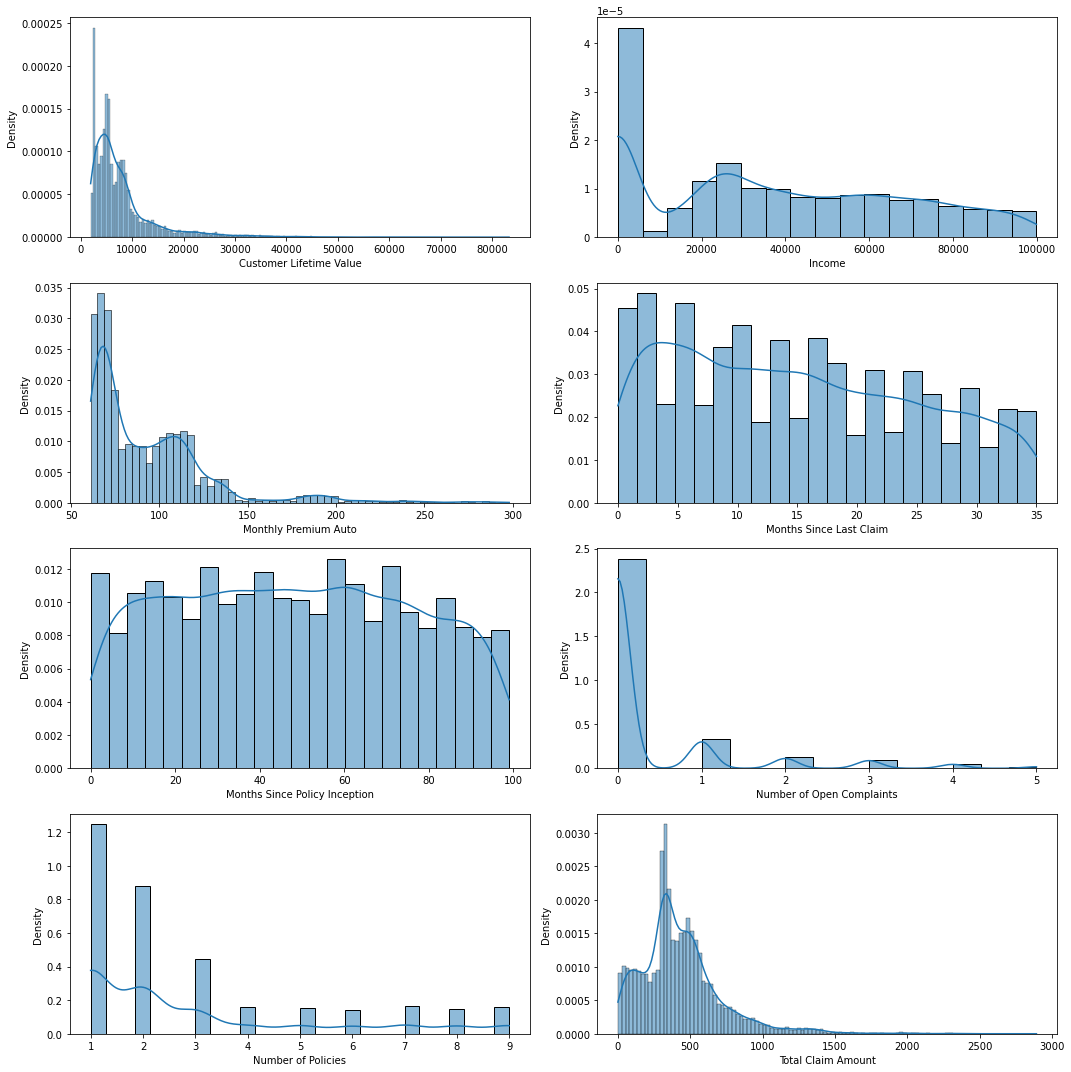

In [5]:
cols = numerical_dataset.columns.to_list()

# create the figure and axes
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=numerical_dataset[col], kde=True, stat='density', ax=ax)

    
fig.tight_layout()
plt.show()

In [6]:
numerical_dataset.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Customer Lifetime Value,3.032280,13.823533
Income,0.286887,-1.094326
Monthly Premium Auto,2.123546,6.193605
Months Since Last Claim,0.278586,-1.073668
Months Since Policy Inception,0.040165,-1.133046
Number of Open Complaints,2.783263,7.749308
Number of Policies,1.253333,0.363157
Total Claim Amount,1.714966,5.979401


### No variables fit the theoretical normal or exponential distirbution

## Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [7]:
data_log = np.log(numerical_dataset)

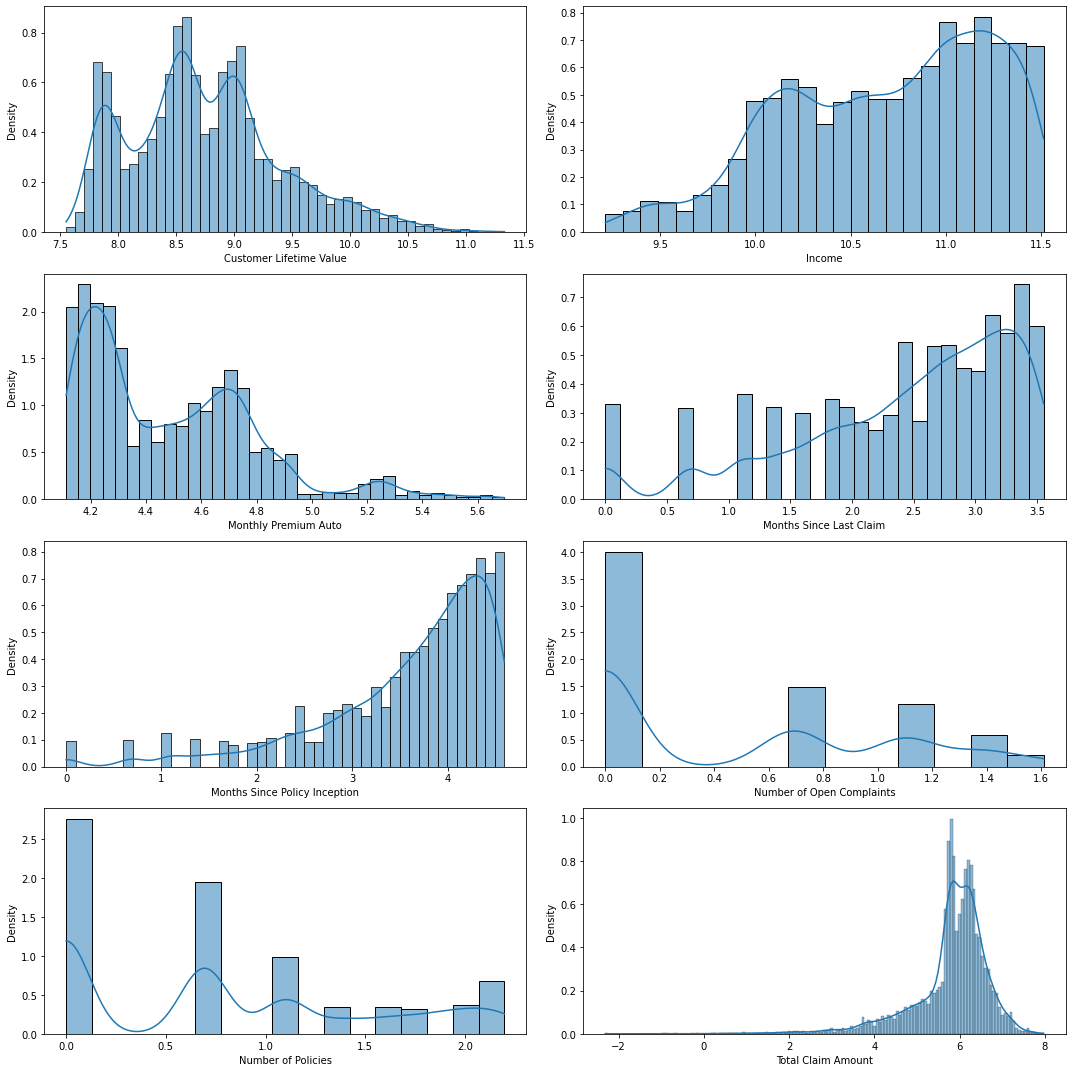

In [8]:
cols = data_log.columns.to_list()

# create the figure and axes
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=data_log[col], kde=True, stat='density', ax=ax)

    
fig.tight_layout()
plt.show()

In [9]:
data_log.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Customer Lifetime Value,0.575941,0.082682
Income,NaN,NaN
Monthly Premium Auto,1.006154,0.841733
Months Since Last Claim,NaN,NaN
Months Since Policy Inception,NaN,NaN
Number of Open Complaints,NaN,NaN
Number of Policies,0.433288,-1.066354
Total Claim Amount,-1.920033,6.359596


### The log transformation changes the plots but none of the variables are normal/exponentially distributed. Total Claim Amount may be the closest.